# Does remote working affect mental health?

### Project Description

Due to the covid-19 pandemic happen in 2019, it has acclearated employers to adopt the remote working framework and applying it in the company. This allow employees to continue working in their homes to protect their health and well-being. Fast forward to today, even though the world have braved through the pandemic, employers still remain remote working as an option while some created a hybrid option, where employees have a mixture of in-person work and remote working.

There can be some benefits with remote working where employees have the ease and comfort of their home to perform their work duties. However, there are some reports stating that remote working does affect the employees mental health due to isolation during working hours. This project aims to identify the pattern on whether remote working does affect mental health and what are some underlying course. It also aims to see which age group is it affecting the most.

### Importing of libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#this will make your plot outputs appear and be stored within the notebook
import seaborn as sns

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

### Importing of dataset

The dataset used in this study is the csv file 'impact of remote working on mental health' obtained from kaggle.

In [ ]:
df = pd.read_csv("remote_working_impact.csv")
df.head() # confirmation that the dataset can be read

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


### Data understanding

In [ ]:
print("Dimension of the data:", df.shape)

print("\n", "--" * 50, "\n")

print("Summary of the data\n")
display(df.info())

print("\n", "--" * 50, "\n")

print("Missing values in the entire dataframe\n")
display(df.isnull().sum())

print("\n", "--" * 50, "\n")
print("Statistical description:\n")
display(df.describe())

Dimension of the data: (5000, 20)

 ---------------------------------------------------------------------------------------------------- 

Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           

None


 ---------------------------------------------------------------------------------------------------- 

Missing values in the entire dataframe



Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


 ---------------------------------------------------------------------------------------------------- 

Statistical description:



,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


## Data Preparation

In this dataframe, there are some missing values for the mental health condition and physical activity column.

<b> Missing values </b>

Mental health condition: 1196

Physical activity: 1629

Thus, replace the missing values of each column with mode value.

In [ ]:
print("The mode for the two column")
print("\n Mental Health Condition: ", df['Mental_Health_Condition'].mode())
print("\n Physical Activity", df['Physical_Activity'].mode())

The mode for the two column

 Mental Health Condition:  0    Burnout
Name: Mental_Health_Condition, dtype: object

 Physical Activity 0    Weekly
Name: Physical_Activity, dtype: object


The mode of the mental health condition is burnout, however, we can't categorise those employees that have Na under the mental health condition as burnout as it will be make the data skewed to burnout. Thus we can only replace as No Condidtions.

In [ ]:
df['Mental_Health_Condition'].fillna('No Condition', inplace = True) # replacing the Mental Health Condition values
df['Physical_Activity'].fillna('Weekly', inplace = True) # replacing the Physical Activity values

#confirming the values have been replaced
print("Missing values in the entire dataframe\n")
display(df.isnull().sum())

Missing values in the entire dataframe



Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

### Exploratory Data Analysis

After prepping the dataframe by replacing all the missing values, exploratory data analysis can be performed.

In [ ]:
print("Size of the dataset", df.shape)

Size of the dataset (5000, 20)


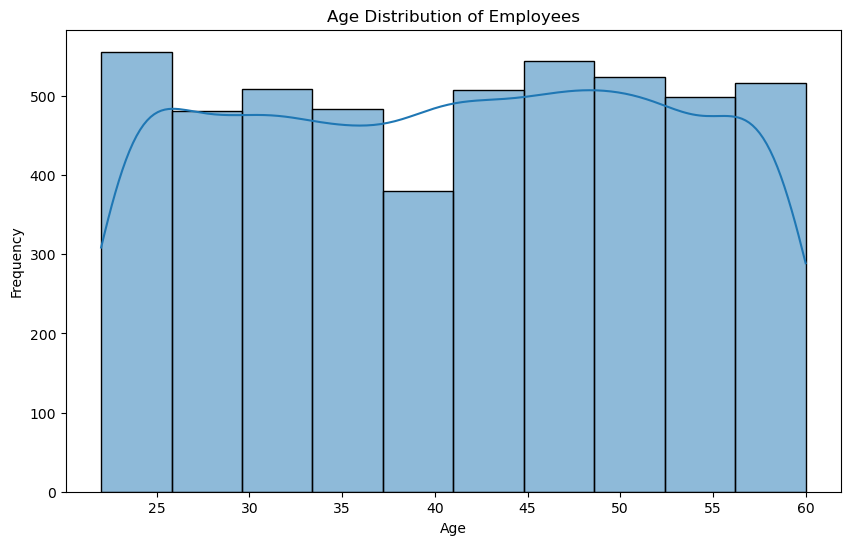

In [ ]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

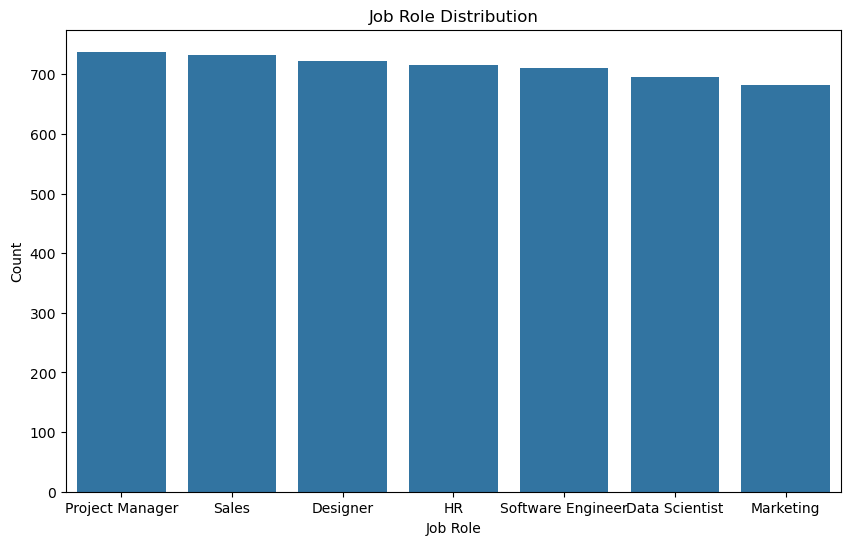

In [ ]:
# Job role distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Job_Role', order=df['Job_Role'].value_counts().index)
plt.title('Job Role Distribution')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.show()

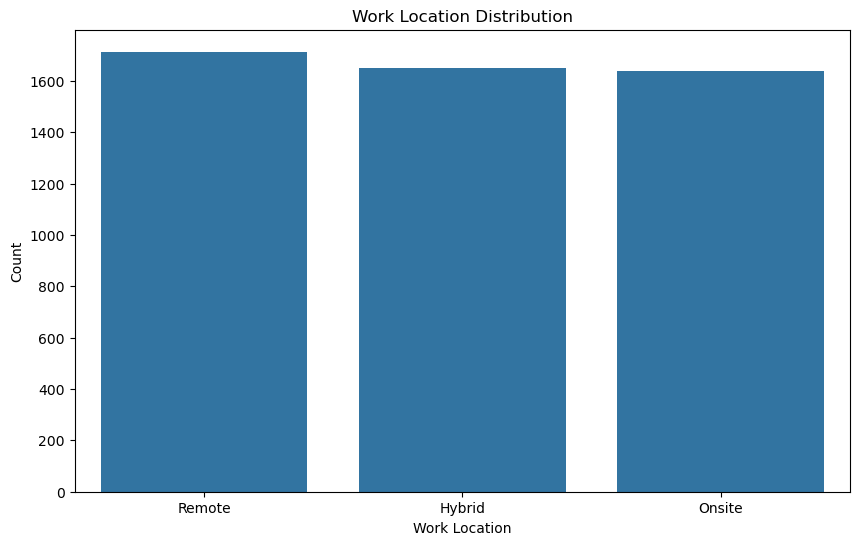

In [ ]:
# Work location distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Location', order=df['Work_Location'].value_counts().index)
plt.title('Work Location Distribution')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.show()

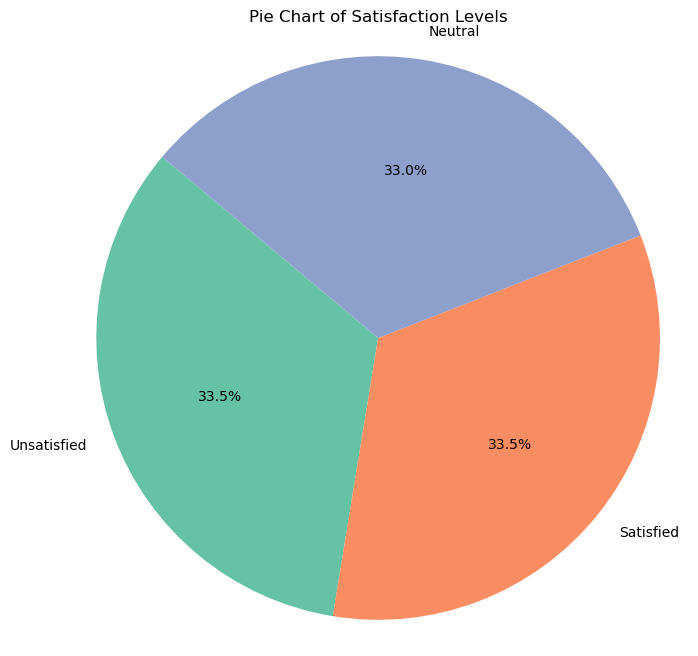

In [ ]:
# pie chart for satisfaction levels
satisfaction_counts = df['Satisfaction_with_Remote_Work'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Pie Chart of Satisfaction Levels')
plt.axis('equal')
plt.show()

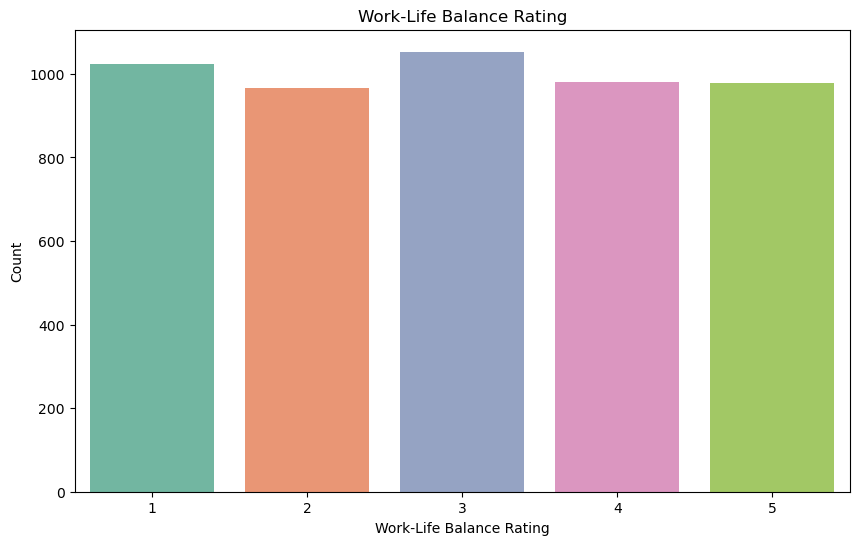

In [ ]:
# Countplot for Work-Life Balance Rating
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Life_Balance_Rating', palette='Set2')
plt.title('Work-Life Balance Rating')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Count')
plt.show()

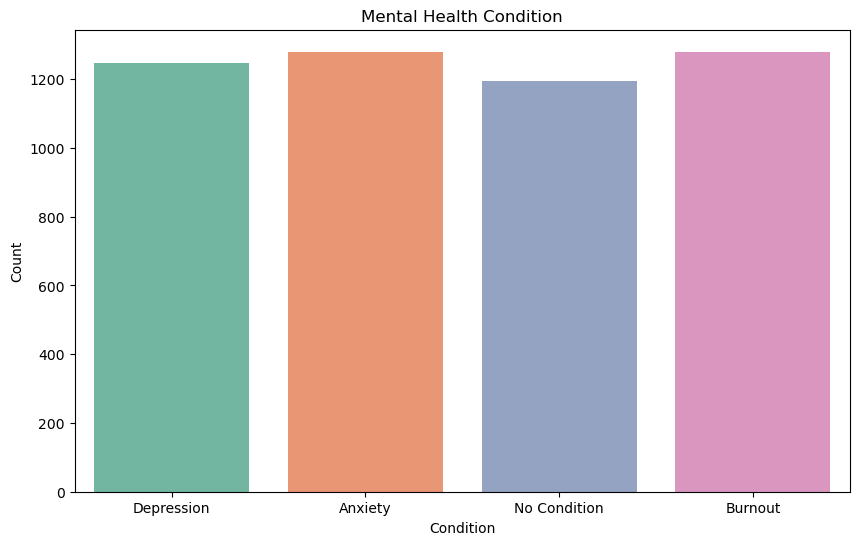

In [ ]:
# Countplot for Mental Health Condition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Mental_Health_Condition', palette='Set2')
plt.title('Mental Health Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

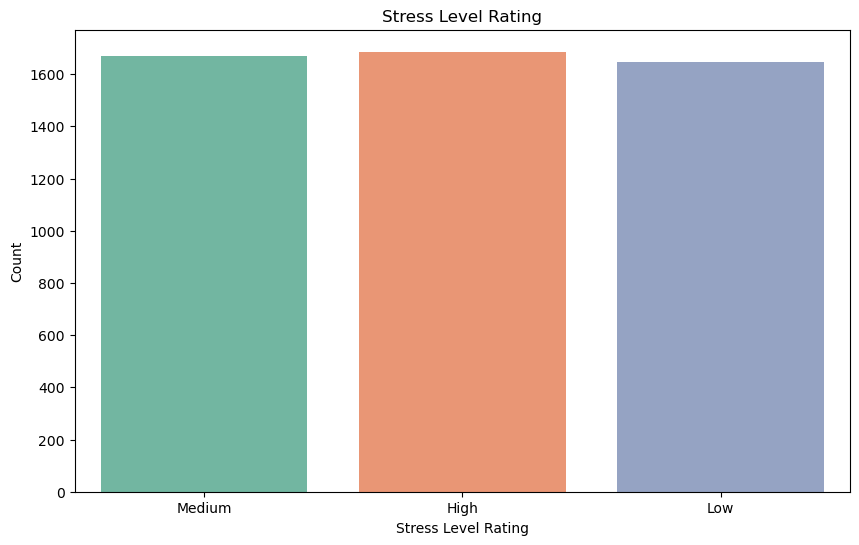

In [ ]:
# Countplot for Stress level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stress_Level', palette='Set2')
plt.title('Stress Level Rating')
plt.xlabel('Stress Level Rating')
plt.ylabel('Count')
plt.show()

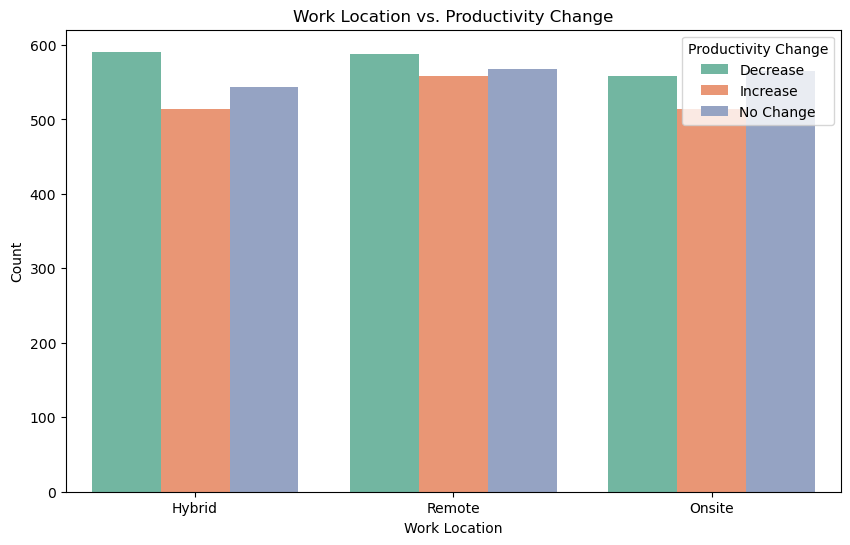

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Location', hue='Productivity_Change', palette='Set2')
plt.title('Work Location vs. Productivity Change')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.legend(title='Productivity Change')
plt.show()

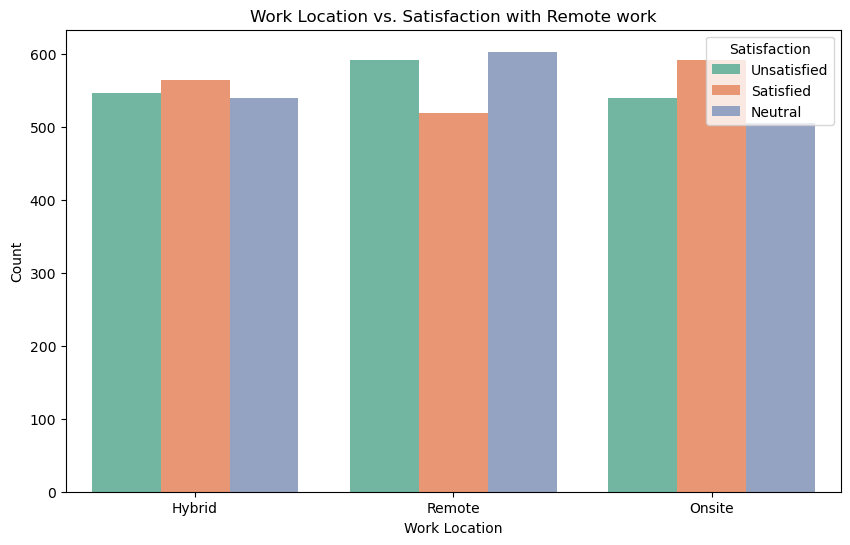

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Location', hue='Satisfaction_with_Remote_Work',palette='Set2')
plt.title('Work Location vs. Satisfaction with Remote work')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()

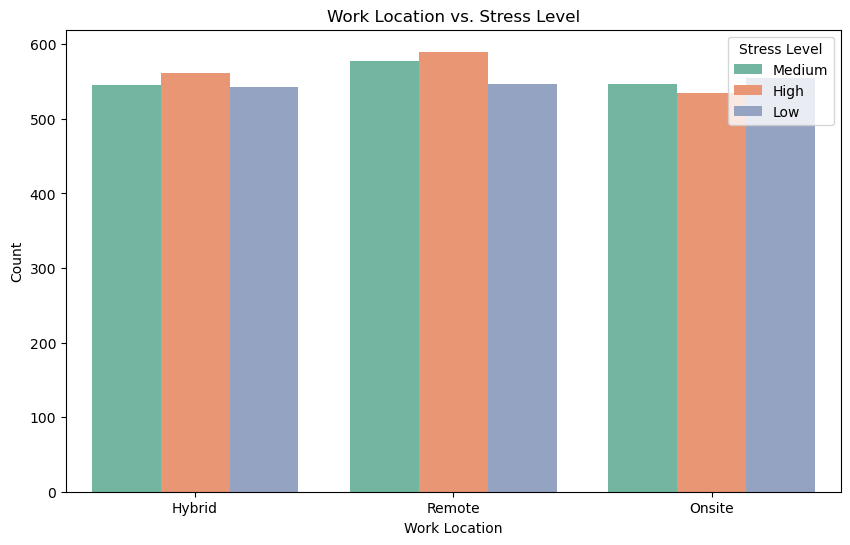

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Location', hue='Stress_Level', palette='Set2')
plt.title('Work Location vs. Stress Level')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.legend(title='Stress Level')
plt.show()

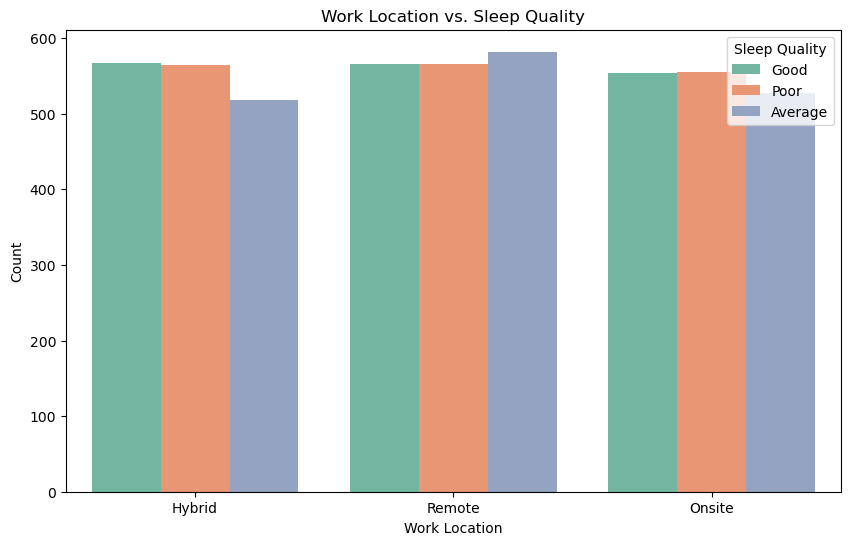

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Location', hue='Sleep_Quality',palette='Set2')
plt.title('Work Location vs. Sleep Quality')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.legend(title='Sleep Quality')
plt.show()

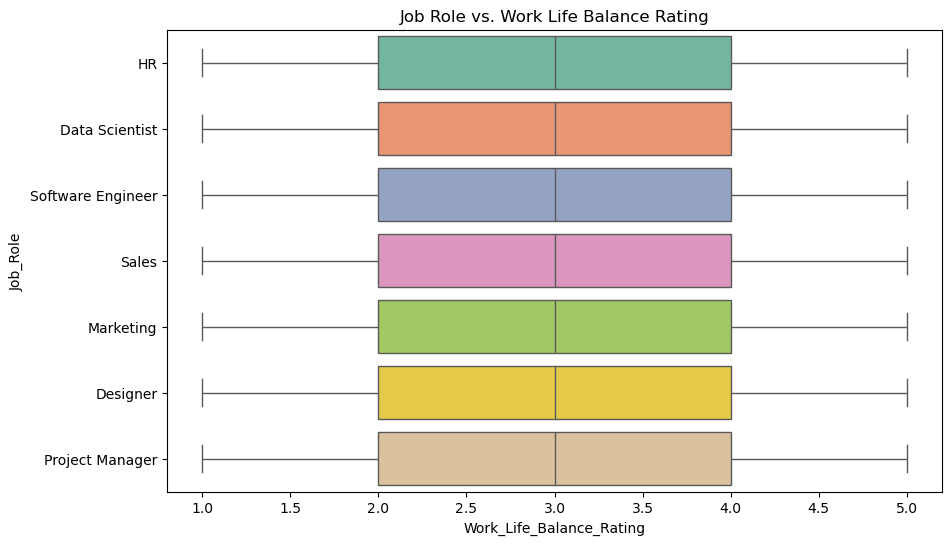

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Work_Life_Balance_Rating', y='Job_Role', palette='Set2')
plt.title('Job Role vs. Work Life Balance Rating')
plt.show()

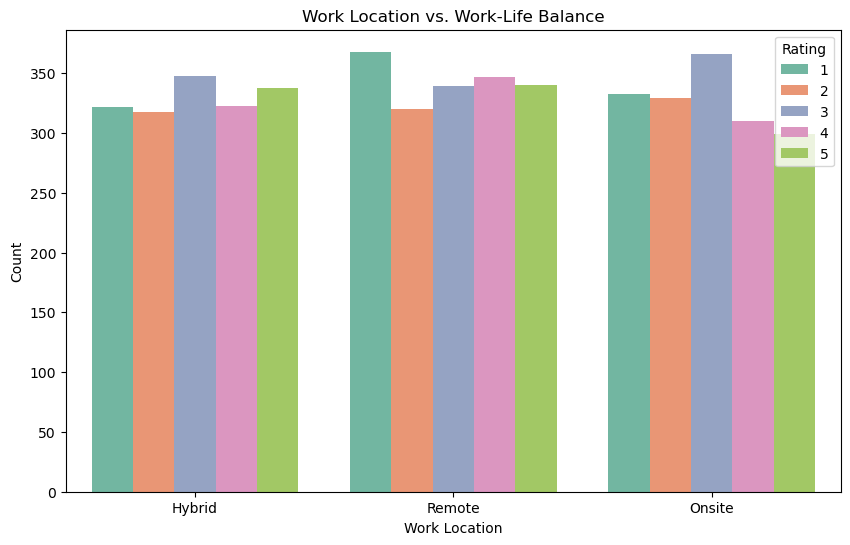

In [ ]:
# work-life balance rating based on work location
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Location', hue='Work_Life_Balance_Rating',palette='Set2')
plt.title('Work Location vs. Work-Life Balance')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.legend(title='Rating')
plt.show()

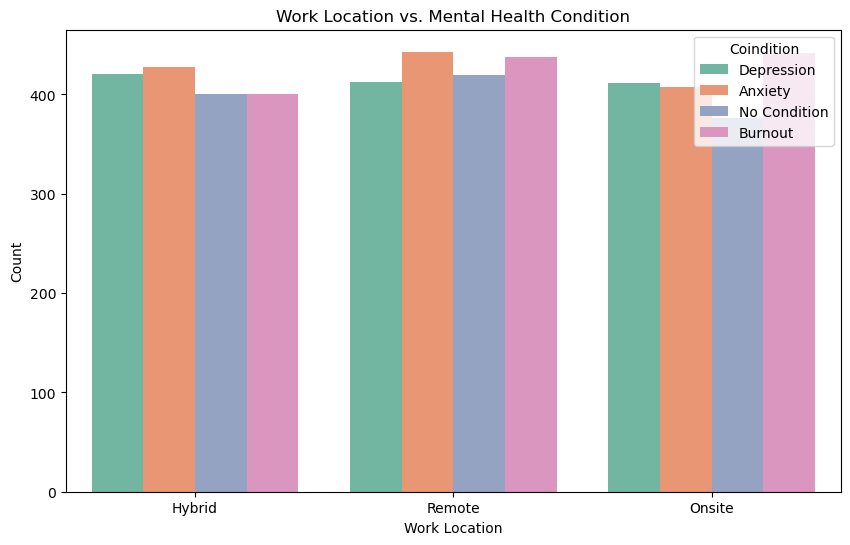

In [ ]:
# Mental Health Condition based on work location
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Location', hue='Mental_Health_Condition',palette='Set2')
plt.title('Work Location vs. Mental Health Condition')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.legend(title='Coindition')
plt.show()

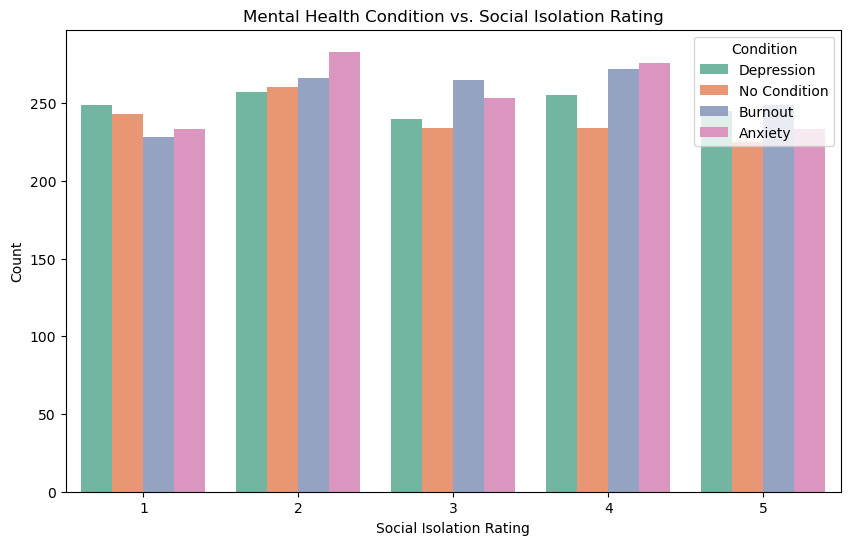

In [ ]:
# Mental Health Condition affect social isolation rating
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Social_Isolation_Rating', hue='Mental_Health_Condition',palette='Set2')
plt.title( 'Mental Health Condition vs. Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Count')
plt.legend(title='Condition')
plt.show()

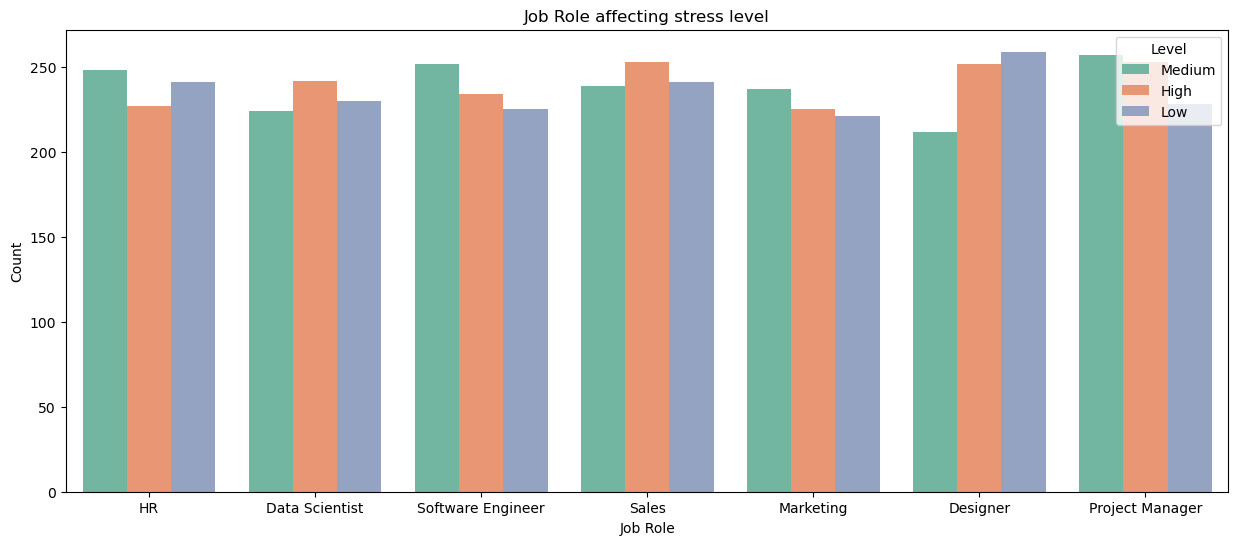

In [ ]:
# Job Roles affecting Stress Level
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Job_Role', hue='Stress_Level',palette='Set2')
plt.title('Job Role affecting stress level')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.legend(title='Level')
plt.show()

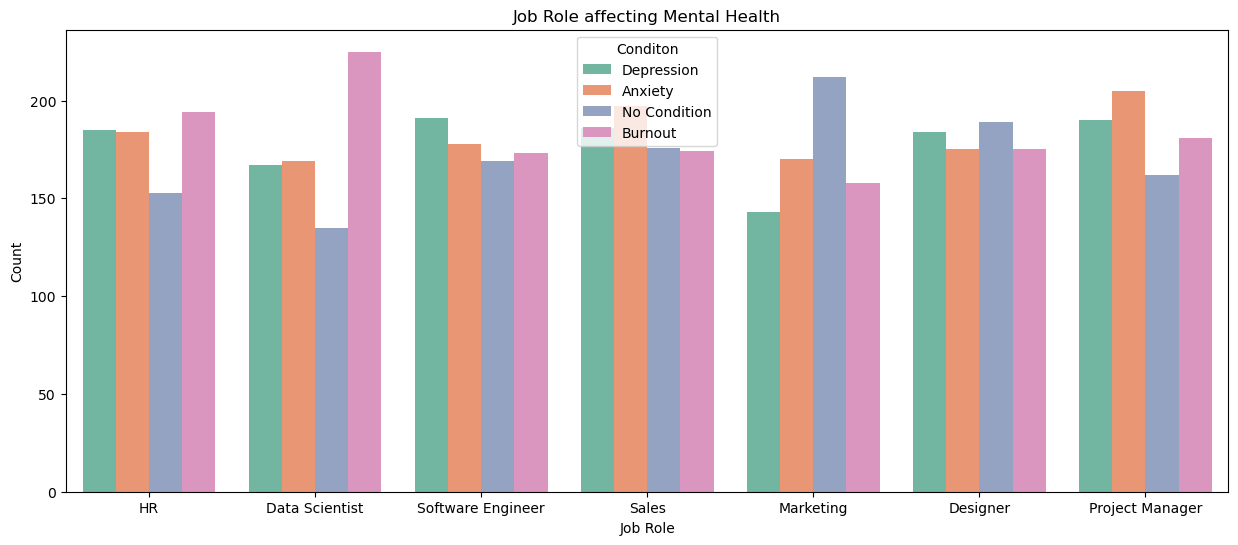

In [ ]:
# Job Roles affecting Mental Health
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Job_Role', hue='Mental_Health_Condition',palette='Set2')
plt.title('Job Role affecting Mental Health')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.legend(title='Conditon')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder # for Label Encoder - to transform string into values
LE = LabelEncoder()
columns_to_encode = ['Job_Role', 'Work_Location', 'Stress_Level', 'Mental_Health_Condition', 'Productivity_Change', 'Sleep_Quality', 'Physical_Activity']
for col in columns_to_encode:
    df[col] = LE.fit_transform(df[col])

df.head() # confirm that it has been encoded

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,2,Healthcare,13,0,47,7,2,2,2,No,0,1,Unsatisfied,1,1,1,Europe
1,EMP0002,40,Female,0,IT,3,2,52,4,1,2,0,No,1,3,Satisfied,2,1,1,Asia
2,EMP0003,59,Non-binary,6,Education,22,0,46,11,5,2,0,No,2,4,Unsatisfied,5,1,2,North America
3,EMP0004,27,Male,6,Finance,20,1,32,8,4,0,2,Yes,1,3,Unsatisfied,3,1,2,Europe
4,EMP0005,49,Male,5,Consulting,32,1,35,12,2,0,3,Yes,0,3,Unsatisfied,3,1,0,North America


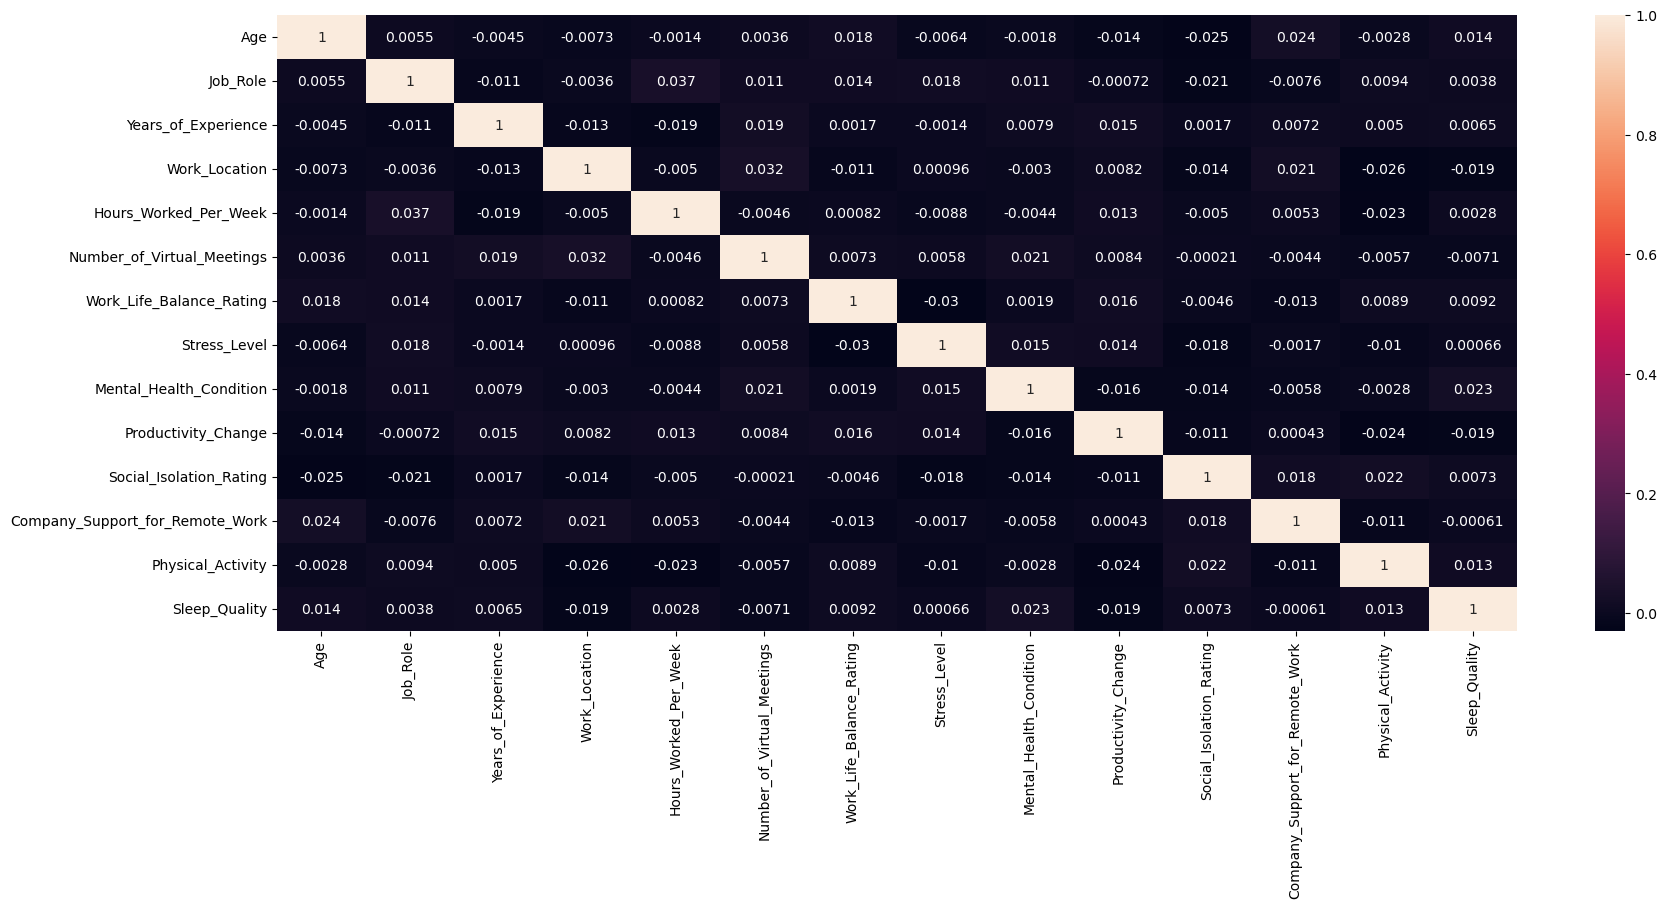

In [ ]:
# plotting of correlation matrix

numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
numeric_df.corr()
plt.figure(figsize = (20, 8))
sns.heatmap(numeric_df.corr(), annot = True);

## Limitations

In this dataset, there are two features that does consist of null values. The physical actity and mental health conditions. With the null values, it does affect the analysis as the analysis was on mental health conditions. I also felt that the ratings for the mental health conditions are not clearly defined which might affect in the collection of data.

## Conclusion

**Feature Importance**
<br>The analysis shows to certain extent that remote working does affect mental health. However, there are some other variables such as job roles and physical activity that might have caused it. Therefore, features in the dataset is important.
<br>
<br>
**Insights and Recommendation**
<br>From the analysis, it shows that remote working can affect more variables and does not affect mental health alone. A trend can also be seen that remote working may not be good for both the employer and employee. However, more analysis and data collection is needed to be able to come to a conclusion.

## Future Work

**Compulsory Data Collection**
<br> The data for mental health conditions and physical activity can't be left unanswered as it will affect the analysis. Therefore, in the data collection, the question regarding this two features can't be left blank.
<br><br>
**Precise Data Collection**
<br> There's a need to scope down to the two main features, which is mental health and remote working. This would reduce other factors that might affect the analysis.